In [2]:
import pandas as pd

df = pd.read_csv("train_aWnotuB.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
df.shape

(48120, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [7]:
df['DateTime'].min(), df['DateTime'].max()

(Timestamp('2015-11-01 00:00:00'), Timestamp('2017-06-30 23:00:00'))

In [8]:
df.sort_values('DateTime').head(), df.sort_values('DateTime').tail()

(                 DateTime  Junction  Vehicles           ID
 0     2015-11-01 00:00:00         1        15  20151101001
 14592 2015-11-01 00:00:00         2         6  20151101002
 29184 2015-11-01 00:00:00         3         9  20151101003
 29185 2015-11-01 01:00:00         3         7  20151101013
 1     2015-11-01 01:00:00         1        13  20151101011,
                  DateTime  Junction  Vehicles           ID
 43774 2017-06-30 22:00:00         3        26  20170630223
 14591 2017-06-30 23:00:00         1        78  20170630231
 43775 2017-06-30 23:00:00         3        39  20170630233
 29183 2017-06-30 23:00:00         2        27  20170630232
 48119 2017-06-30 23:00:00         4        12  20170630234)

In [9]:
df.groupby('Junction')['DateTime'].agg(['min', 'max', 'count'])

,min,max,count
Junction,,,
1,2015-11-01,2017-06-30 23:00:00,14592
2,2015-11-01,2017-06-30 23:00:00,14592
3,2015-11-01,2017-06-30 23:00:00,14592
4,2017-01-01,2017-06-30 23:00:00,4344


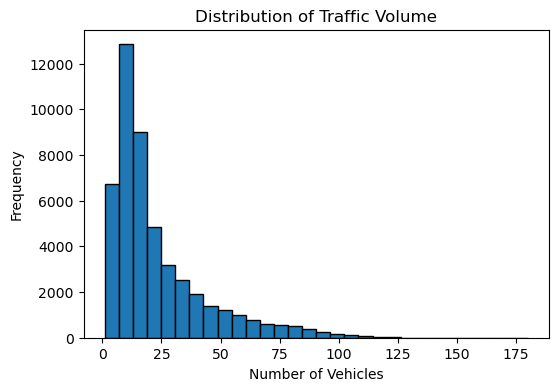

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['Vehicles'], bins=30, edgecolor='black')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Volume')
plt.show()


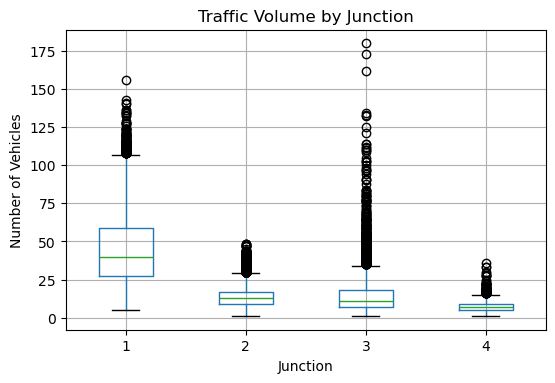

In [11]:
df.boxplot(column='Vehicles', by='Junction', figsize=(6,4))
plt.title('Traffic Volume by Junction')
plt.suptitle('')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()


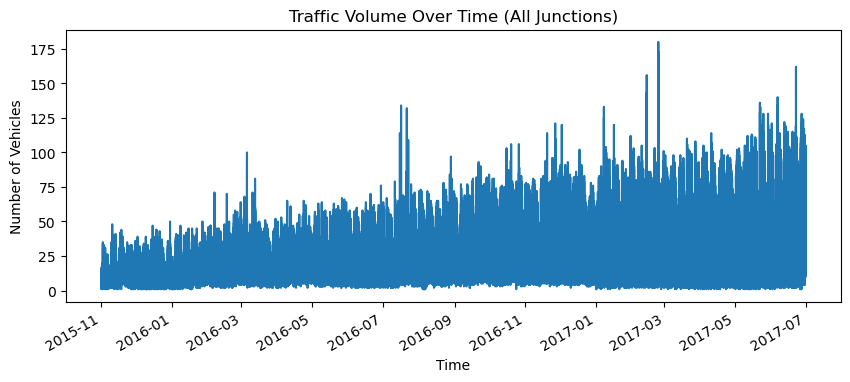

In [12]:
df.set_index('DateTime')['Vehicles'].plot(figsize=(10,4))
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Volume Over Time (All Junctions)')
plt.show()


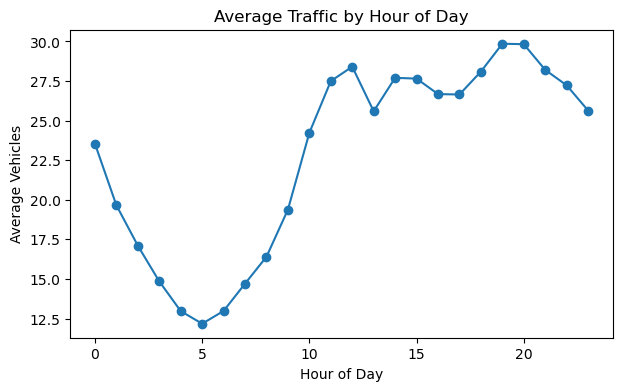

In [13]:
df['Hour'] = df['DateTime'].dt.hour

hourly_avg = df.groupby('Hour')['Vehicles'].mean()

plt.figure(figsize=(7,4))
hourly_avg.plot(kind='line', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicles')
plt.title('Average Traffic by Hour of Day')
plt.show()


In [14]:
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])

df.groupby('IsWeekend')['Vehicles'].mean()


IsWeekend
False    24.760163
True     17.834722
Name: Vehicles, dtype: float64

RESET & PREPARE DATAFRAME

In [15]:
import pandas as pd

df = pd.read_csv("train_aWnotuB.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [16]:
df.head()
df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [17]:
['DateTime', 'Junction', 'Vehicles', 'ID']


['DateTime', 'Junction', 'Vehicles', 'ID']

FEATURE ENGINEERING

In [18]:
df['Hour'] = df['DateTime'].dt.hour


In [19]:
df['DayOfWeek'] = df['DateTime'].dt.dayofweek


In [20]:
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)


In [21]:
df['Month'] = df['DateTime'].dt.month


In [22]:
df = df.drop(columns=['ID'])


In [23]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   48120 non-null  datetime64[ns]
 1   Junction   48120 non-null  int64         
 2   Vehicles   48120 non-null  int64         
 3   Hour       48120 non-null  int32         
 4   DayOfWeek  48120 non-null  int32         
 5   IsWeekend  48120 non-null  int32         
 6   Month      48120 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(2)
memory usage: 1.8 MB


ENCODING CATEGORICAL FEATURES

In [24]:
df = pd.get_dummies(df, columns=['Junction'], drop_first=True)


In [25]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    48120 non-null  datetime64[ns]
 1   Vehicles    48120 non-null  int64         
 2   Hour        48120 non-null  int32         
 3   DayOfWeek   48120 non-null  int32         
 4   IsWeekend   48120 non-null  int32         
 5   Month       48120 non-null  int32         
 6   Junction_2  48120 non-null  bool          
 7   Junction_3  48120 non-null  bool          
 8   Junction_4  48120 non-null  bool          
dtypes: bool(3), datetime64[ns](1), int32(4), int64(1)
memory usage: 1.6 MB


In [26]:
y = df['Vehicles']


In [28]:
X = df.drop(columns=['Vehicles', 'DateTime'])

In [29]:
X.head()
X.shape
y.shape

(48120,)

In [30]:
df_sorted = df.sort_values('DateTime')


In [31]:
split_index = int(len(df_sorted) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

In [32]:
X_train.shape, X_test.shape


((38496, 7), (9624, 7))

In [33]:
#CORRECT TIME-AWARE SPLIT
# Sort dataframe by time
df_sorted = df.sort_values('DateTime')

# Recreate X and y from the sorted dataframe
X_sorted = df_sorted.drop(columns=['Vehicles', 'DateTime'])
y_sorted = df_sorted['Vehicles']

# Time-based split (80/20)
split_index = int(len(df_sorted) * 0.8)

X_train = X_sorted.iloc[:split_index]
X_test  = X_sorted.iloc[split_index:]

y_train = y_sorted.iloc[:split_index]
y_test  = y_sorted.iloc[split_index:]


In [34]:
X_train.shape, X_test.shape


((38496, 7), (9624, 7))

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize model
lr_model = LinearRegression()

# Train
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

lr_r2, lr_mae, lr_rmse


(0.49797517443319417, 12.415619168433446, 19.289748811551434)

RANDOM FOREST REGRESSOR

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [37]:
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_r2, rf_mae, rf_rmse


(0.46057227287847413, 13.625569148607553, 19.995423567717417)

ADD LAG FEATURES

In [43]:
df_sorted = df.sort_values(['Junction_2', 'Junction_3', 'Junction_4', 'DateTime'])


In [44]:
df = pd.read_csv("train_aWnotuB.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [45]:
df = df.sort_values(['Junction', 'DateTime'])

df['Vehicles_lag_1'] = df.groupby('Junction')['Vehicles'].shift(1)
df['Vehicles_lag_24'] = df.groupby('Junction')['Vehicles'].shift(24)


In [46]:
df = df.dropna()


In [47]:
df = pd.get_dummies(df, columns=['Junction'], drop_first=True)


In [48]:
y = df['Vehicles']
X = df.drop(columns=['Vehicles', 'DateTime', 'ID'])

split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In [49]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_r2, rf_mae, rf_rmse


(0.6952659376617915, 3.10009661855859, 5.502131808049694)

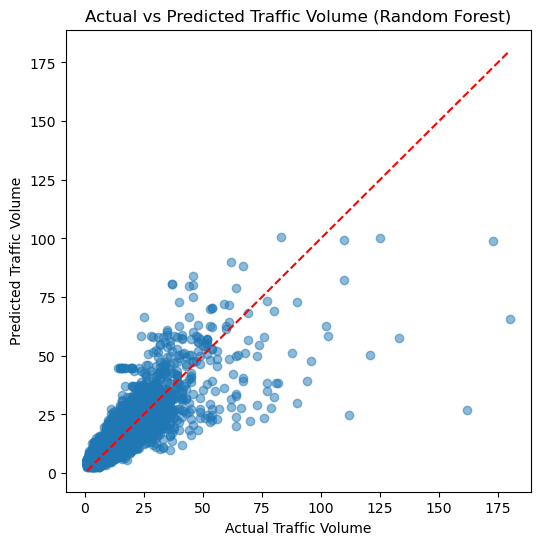

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--'
)

plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs Predicted Traffic Volume (Random Forest)")
plt.show()


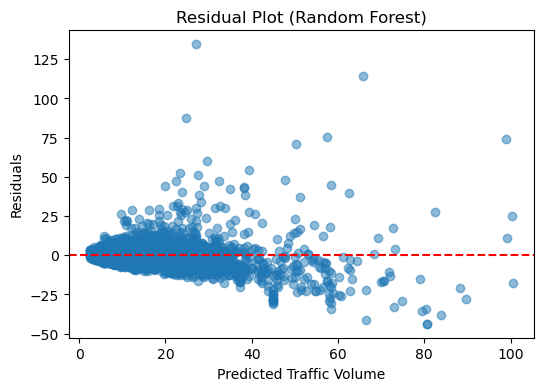

In [51]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Traffic Volume")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()


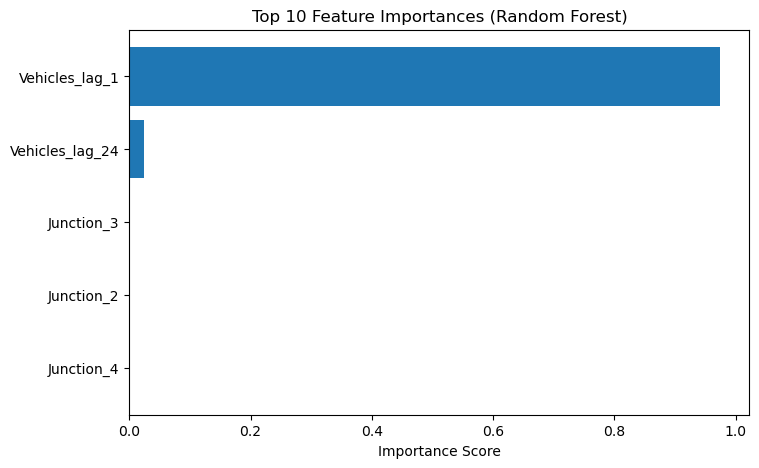

,Feature,Importance
0,Vehicles_lag_1,0.974313
1,Vehicles_lag_24,0.023524
3,Junction_3,0.001608
2,Junction_2,0.000555
4,Junction_4,0.000000


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(8,5))
plt.barh(
    feature_importance_df['Feature'][:10],
    feature_importance_df['Importance'][:10]
)
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

feature_importance_df.head(10)


GENERATING PREDICTIONS ON THE TEST DATASET

In [54]:
test_df = pd.read_csv("datasets_8494_11879_test_BdBKkAj.csv")
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])

test_df.head()


,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [66]:
df_train_raw = pd.read_csv("train_aWnotuB.csv")
df_train_raw['DateTime'] = pd.to_datetime(df_train_raw['DateTime'])


In [67]:
last_lag_1 = (
    df_train_raw.groupby('Junction')['Vehicles'].last()
)

last_lag_24 = (
    df_train_raw.groupby('Junction')['Vehicles'].nth(-24)
)


In [69]:
test_df['Vehicles_lag_1'] = test_df['Junction'].map(last_lag_1)
test_df['Vehicles_lag_24'] = test_df['Junction'].map(last_lag_24)


In [70]:
test_df[['Junction', 'Vehicles_lag_1', 'Vehicles_lag_24']].head()


,Junction,Vehicles_lag_1,Vehicles_lag_24
0,1,78,NaN
1,1,78,NaN
2,1,78,NaN
3,1,78,NaN
4,1,78,NaN


In [71]:
test_df['Vehicles_lag_24'] = test_df['Vehicles_lag_24'].fillna(
    test_df['Vehicles_lag_1']
)


In [72]:
test_df[['Junction', 'Vehicles_lag_1', 'Vehicles_lag_24']].head()


,Junction,Vehicles_lag_1,Vehicles_lag_24
0,1,78,78.0
1,1,78,78.0
2,1,78,78.0
3,1,78,78.0
4,1,78,78.0


In [73]:
test_df_encoded = pd.get_dummies(test_df, columns=['Junction'], drop_first=True)


In [74]:
test_X = test_df_encoded.reindex(columns=X_train.columns, fill_value=0)


In [75]:
test_predictions = rf_model.predict(test_X)

test_predictions[:10]


array([81.98854167, 81.98854167, 81.98854167, 81.98854167, 81.98854167,
       81.98854167, 81.98854167, 81.98854167, 81.98854167, 81.98854167])

In [76]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Predicted_Vehicles': test_predictions
})

submission.to_csv("traffic_volume_predictions.csv", index=False)
